In [1]:
'''
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million 
lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be 
used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use,
unhealthy diet and obesity,
physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk 
(due to the presence of one or more risk factors such as hypertension, diabetes, 
hyperlipidaemia or already established disease) need early detection and management wherein 
a machine learning model can be of great help.


'''

'\nCardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million \nlives each year, which accounts for 31% of all deaths worlwide.\nHeart failure is a common event caused by CVDs and this dataset contains 12 features that can be \nused to predict mortality by heart failure.\n\nMost cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use,\nunhealthy diet and obesity,\nphysical inactivity and harmful use of alcohol using population-wide strategies.\n\nPeople with cardiovascular disease or who are at high cardiovascular risk \n(due to the presence of one or more risk factors such as hypertension, diabetes, \nhyperlipidaemia or already established disease) need early detection and management wherein \na machine learning model can be of great help.\n\n\n'

Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)-کم خونی
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)---10 to 120 micrograms per liter (mcg/L)

- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)---EF  در قلب نرمال بین 55 تا 70 درصد می تواند باشد
- platelets: platelets in the blood (kiloplatelets/mL)--۱۵۰ تا ۴۵۰ هزار عدد در هر
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)--جواب آزمایش creatinine ( کراتین ): مقدار طبیعی کراتینین خون در مردان ۰٫۸-۱٫۲ mg/dl (در برخی موارد تا ۱٫۵ mg/dl ) و در زنان ۰٫۶-۰٫۹ mg/dl می باشد.

- serum sodium: level of serum sodium in the blood (mEq/L)


مقادیر نرمال
نوزادان : 134-144 mEq/L
اطفال : 134-150 mEq/L
کودکان : 136-145 mEq/L
بزرگسالان : 136-145 mEq/L


- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
##There is no null.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
int_= df.select_dtypes(include='int64')
fl_= df.select_dtypes(include='float')

In [9]:
int_.columns

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
fl_.columns

Index(['age', 'platelets', 'serum_creatinine'], dtype='object')

In [11]:
con = ['age', 'platelets', 'serum_creatinine','serum_sodium']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D54E12AEC8>,
      dtype=object)

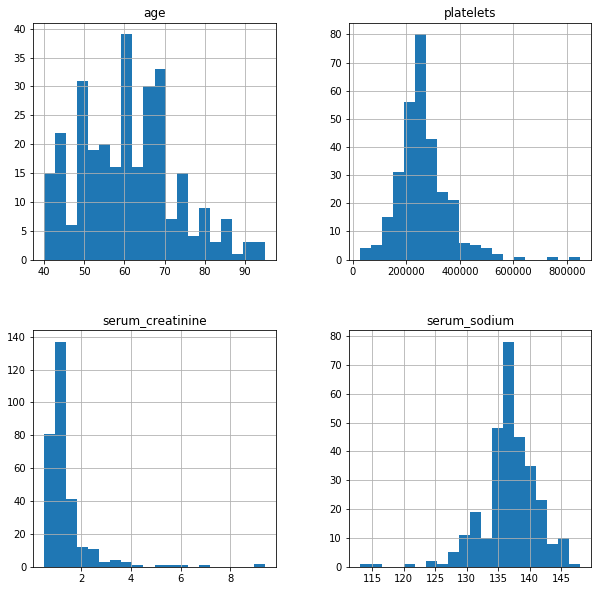

In [12]:
df[con].hist(bins=20, figsize=(10, 10))

In [13]:
df[con].describe()

,age,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.00000,299.000000
mean,60.833893,263358.029264,1.39388,136.625418
std,11.894809,97804.236869,1.03451,4.412477
min,40.000000,25100.000000,0.50000,113.000000
25%,51.000000,212500.000000,0.90000,134.000000
50%,60.000000,262000.000000,1.10000,137.000000
75%,70.000000,303500.000000,1.40000,140.000000
max,95.000000,850000.000000,9.40000,148.000000


In [14]:
df['sex1']=df.sex.replace({1:'Male',0:'Female'})

In [15]:
df['Marg'] = df.DEATH_EVENT.replace({1:'yes',0:'No'})

In [16]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,Marg
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Male,No
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Female,No
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Female,No
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Male,No


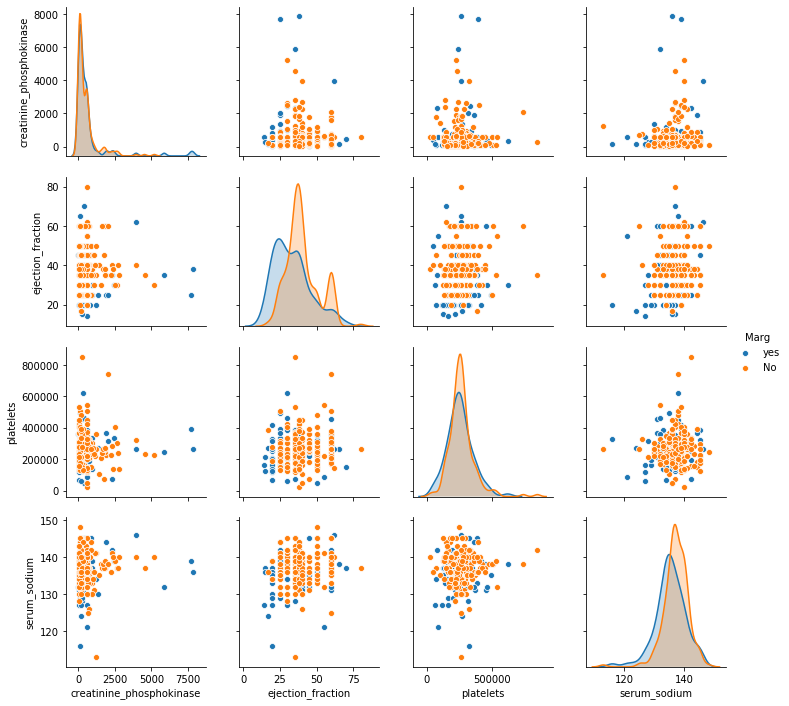

In [17]:
sns.pairplot(df[['creatinine_phosphokinase','ejection_fraction','platelets','serum_sodium','Marg']],hue='Marg')



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
sex1                        299 non-null object
Marg                        299 non-null object
dtypes: float64(3), int64(10), object(2)
memory usage: 35.2+ KB


In [19]:
df[['sex1','anaemia','diabetes','smoking','Marg']]

,sex1,anaemia,diabetes,smoking,Marg
0,Male,0,0,0,yes
1,Male,0,0,0,yes
2,Male,0,0,1,yes
3,Male,1,0,0,yes
4,Female,1,1,0,yes
...,...,...,...,...,...
294,Male,0,1,1,No
295,Female,0,0,0,No
296,Female,0,1,0,No
297,Male,0,0,1,No


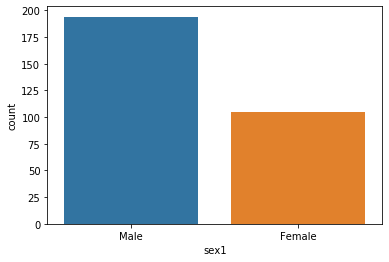

In [20]:
sns.countplot(df['sex1'],data= df)

In [21]:
pd.options.display.float_format='{:,.2f}'.format
df.sex1.value_counts()/df.shape[0]

Male     0.65
Female   0.35
Name: sex1, dtype: float64

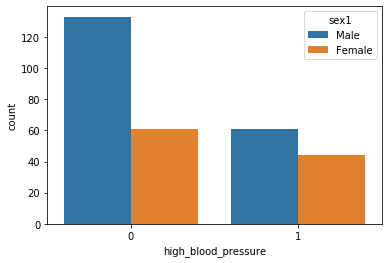

In [22]:
sns.countplot(df['high_blood_pressure'],data=df,hue=df['sex1'])

In [23]:
df.high_blood_pressure.value_counts()/df.shape[0]

0   0.65
1   0.35
Name: high_blood_pressure, dtype: float64

In [24]:
from collections import Counter

In [25]:
Sur = ['high_blood_pressure','sex1']

Counter(df['high_blood_pressure']).most_common()

[(0, 194), (1, 105)]

In [26]:
for i in (df[Sur]):
    x = Counter(df[i])
    print(x)

Counter({0: 194, 1: 105})
Counter({'Male': 194, 'Female': 105})


In [27]:
df.groupby(['high_blood_pressure','sex1']).agg(['count'])

age anaemia creatinine_phosphokinase diabetes  \
                           count   count                    count    count   
high_blood_pressure sex1                                                     
0                   Female    61      61                       61       61   
                    Male     133     133                      133      133   
1                   Female    44      44                       44       44   
                    Male      61      61                       61       61   

                           ejection_fraction platelets serum_creatinine  \
                                       count     count            count   
high_blood_pressure sex1                                                  
0                   Female                61        61               61   
                    Male                 133       133              133   
1                   Female                44        44               44   
                    Male                  61        61               61   

                           serum_sodium   sex smoking  time DEATH_EVENT  Marg  
                                  count count   count count       count count  
high_blood_pressure sex1                                                       
0                   Female           61    61      61    61          61    61  
                    Male            133   133     133   133         133   133  
1                   Female           44    44      44    44          44    44  
                    Male             61    61      61    61          61    61

In [28]:
df.pivot_table(values= ['age'], index=df[['high_blood_pressure','sex1']],columns=['diabetes','smoking'],margins=True)

age                        
diabetes                       0           1         All
smoking                        0     1     0     1      
high_blood_pressure sex1                                
0                   Female 61.89   nan 56.41 60.00 58.98
                    Male   63.54 59.13 58.31 61.56 60.49
1                   Female 60.15 71.00 61.13 50.00 60.88
                    Male   63.57 64.24 61.18 64.00 63.39
All                        62.49 60.80 58.62 61.93 60.83

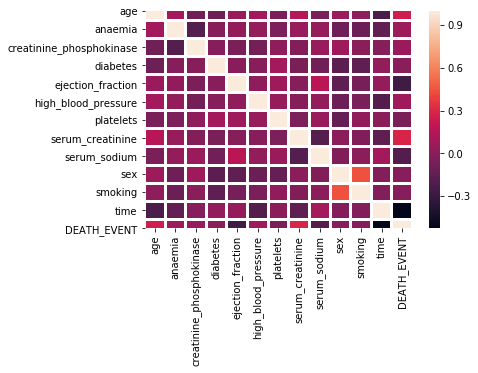

In [29]:
sns.heatmap(df.corr(),linewidths=2)

In [30]:
##Z_SCORE

from scipy import stats

z_score=np.abs(stats.zscore(df.iloc[:,:-2]))

In [31]:
print(np.where(z_score>3))

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))


In [32]:
df_clean=df[(z_score<3.1).all(axis=1)]

In [33]:
df_clean.shape

(280, 15)

In [34]:
df.shape

(299, 15)

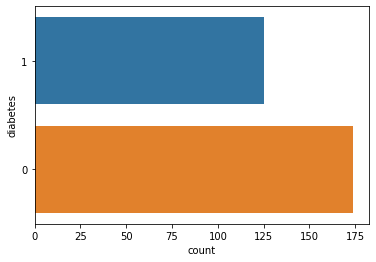

In [35]:
x = df.sex.value_counts()

sns.countplot(y=df['diabetes'],order=x.index)

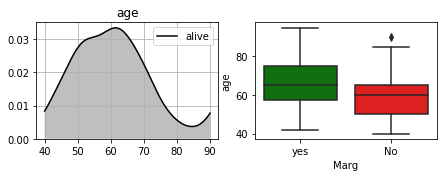

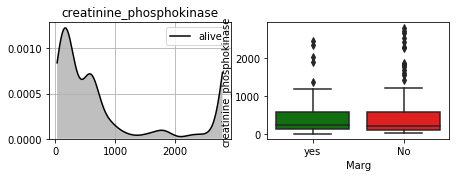

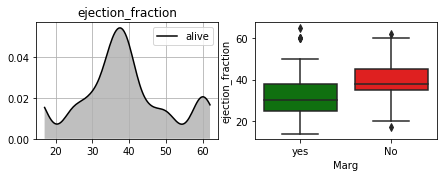

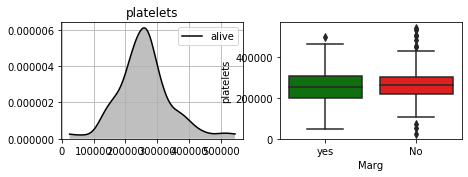

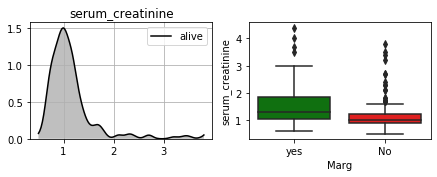

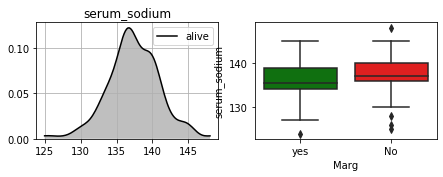

In [36]:
continous_var = ['age', 'creatinine_phosphokinase',
   'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i,col in enumerate(df_clean[continous_var]):
    fig= plt.figure(figsize=(15,15))
    plt.subplot(6,4,i*2+1)
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df_clean.loc[df_clean['Marg']=='No',col],label='alive',color='black',shade=True,
                kernel='gau',cut=0)
    sns.kdeplot(df_clean.loc[df_clean['Marg']=='Yes',col],label='died',color='red',shade=True,
                kernel='gau',cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = df_clean, x="Marg", palette = ["green", "red"])



In [37]:
Ser=["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

In [38]:
df_clean.groupby('Marg')[Ser].agg([np.mean,np.median])

creatinine_phosphokinase        ejection_fraction         platelets  \
                         mean median              mean median       mean   
Marg                                                                       
No                     467.18 231.00             40.15     38 261,565.74   
yes                    433.14 249.50             32.62     30 252,626.33   

                serum_creatinine        serum_sodium          time         
         median             mean median         mean median   mean median  
Marg                                                                       
No   262,500.00             1.14   1.00       137.36 137.00 159.14 174.00  
yes  254,500.00             1.58   1.30       135.63 135.50  73.03  47.50

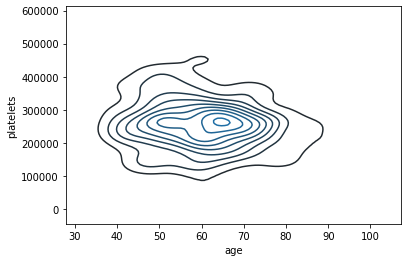

In [39]:
sns.kdeplot(data=df_clean['age'],data2=df_clean['platelets'])

In [40]:
df_clean.groupby(['sex1','high_blood_pressure','Marg']).size().unstack().fillna(0).apply(lambda x:x/x.sum(),axis=1)

Marg                         No  yes
sex1   high_blood_pressure          
Female 0                   0.75 0.25
       1                   0.64 0.36
Male   0                   0.70 0.30
       1                   0.66 0.34

In [41]:
df_clean.groupby(['sex1','smoking','Marg']).size().unstack().fillna(0).apply(lambda x:x/x.sum(),axis=1)

Marg             No  yes
sex1   smoking          
Female 0       0.71 0.29
       1       0.33 0.67
Male   0       0.67 0.33
       1       0.71 0.29

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 298
Data columns (total 15 columns):
age                         280 non-null float64
anaemia                     280 non-null int64
creatinine_phosphokinase    280 non-null int64
diabetes                    280 non-null int64
ejection_fraction           280 non-null int64
high_blood_pressure         280 non-null int64
platelets                   280 non-null float64
serum_creatinine            280 non-null float64
serum_sodium                280 non-null int64
sex                         280 non-null int64
smoking                     280 non-null int64
time                        280 non-null int64
DEATH_EVENT                 280 non-null int64
sex1                        280 non-null object
Marg                        280 non-null object
dtypes: float64(3), int64(10), object(2)
memory usage: 45.0+ KB


In [43]:
var_binary = ['anaemia','diabetes','high_blood_pressure','smoking','sex']

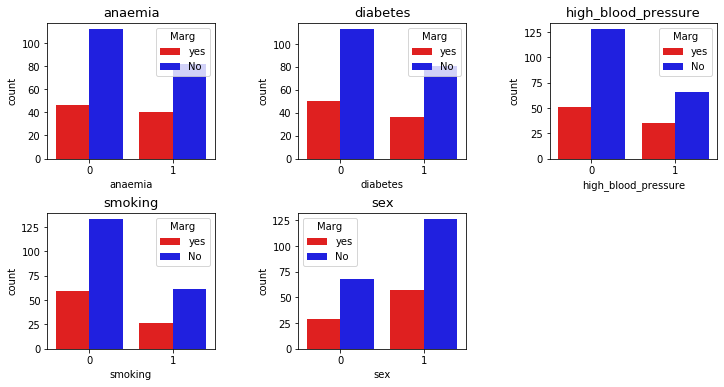

In [44]:
plt.figure(figsize=(12,6))
for i,col in enumerate(df_clean[var_binary]):
    plt.subplot(2,3,i+1)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col,fontsize=13)
    plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.countplot(x=col,data=df_clean,hue='Marg',palette=['red','blue'])

In [45]:
df_clean.groupby(['Marg','sex1'])[var_binary].agg(np.mean)

anaemia  diabetes  high_blood_pressure  smoking  sex
Marg sex1                                                        
No   Female     0.47      0.50                 0.40     0.01 0.00
     Male       0.40      0.37                 0.31     0.48 1.00
yes  Female     0.55      0.59                 0.52     0.07 0.00
     Male       0.42      0.33                 0.35     0.44 1.00

In [46]:
##cross TABE

effect_sex_Marg = pd.crosstab(index=df_clean['sex1'],columns=df_clean['Marg'])
effect_sex_Marg.apply(lambda x:x/x.sum(),axis=1)

Marg,No,yes
sex1,,
Female,0.70,0.30
Male,0.69,0.31


In [47]:
##cross TABE

effect_smoking_sex = pd.crosstab(index=df_clean['sex1'],columns=df_clean['smoking'])
effect_smoking_sex

smoking,0,1
sex1,,
Female,94,3
Male,98,85


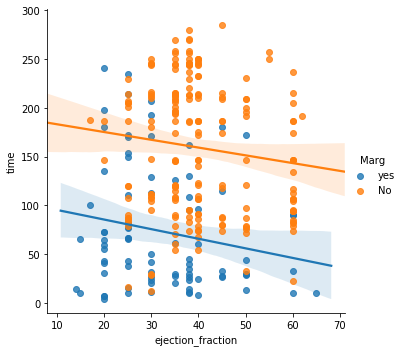

In [48]:
sns.lmplot(x='ejection_fraction',y= 'time',data=df_clean,hue='Marg')

In [49]:
df.groupby('sex1')['ejection_fraction'].agg([np.mean,np.median])

,mean,median
sex1,,
Female,40.47,38
Male,36.79,35


In [50]:
xx = pd.crosstab(index=df_clean['sex1'],columns=df['ejection_fraction'])

xx.apply(lambda z:z/z.sum())

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65
sex1,,,,,,,,,,,,,,,
Female,0.00,0.50,0.50,0.12,0.24,0.41,0.32,0.39,0.44,0.21,0.33,1.00,0.43,0.00,1.00
Male,1.00,0.50,0.50,0.88,0.76,0.59,0.68,0.61,0.56,0.79,0.67,0.00,0.57,1.00,0.00


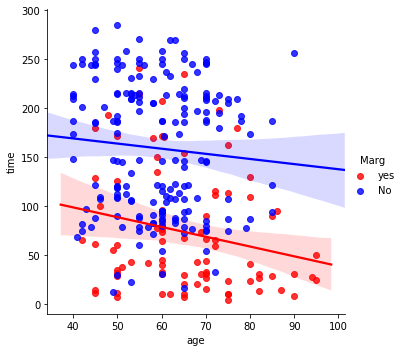

In [51]:
sns.lmplot(x='age',y='time',data=df_clean,hue='Marg',palette=['red','blue'])

In [52]:
df_pre = df_clean.copy()

In [53]:
df_pre.drop(columns=['sex1','Marg'],axis=1,inplace=True)

In [54]:
from math import floor

In [55]:
df_train = floor(df_pre.shape[0]*0.8)
df_test = floor(df_pre.shape[0]*0.2)

In [57]:
df_train = df_pre.iloc[:244]

In [58]:
df_test = df_pre.iloc[244:]

In [59]:
df_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [60]:
y_train = df_train['DEATH_EVENT']
x_train = df_train.drop(columns=['DEATH_EVENT'])

In [61]:
y_test = df_test['DEATH_EVENT']
x_test = df_test.drop(columns=['DEATH_EVENT'])

In [120]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(min_samples_split=13,max_depth=7,random_state=1)

In [182]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(min_samples_split=6,max_depth=3,random_state=21)

In [183]:
dct_fit = dct.fit(x_train,y_train)

pred = dct_fit.predict(x_test)

In [184]:
from sklearn.metrics import classification_report,confusion_matrix

cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)


print('EVALATION_____')
print(cr)
print('\n')
print(cm)

EVALATION_____
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.33      0.50      0.40         2

    accuracy                           0.92        36
   macro avg       0.65      0.72      0.68        36
weighted avg       0.93      0.92      0.92        36



[[32  2]
 [ 1  1]]


In [185]:
train_score  = dct.score(x_train,y_train)
test_score = dct.score(x_test,y_test)
print('The train score is {:.2f}'.format(train_score),'\n-----------')
print('The test score is {:.2f}'.format(test_score))


The train score is 0.89 
-----------
The test score is 0.92


In [186]:
dct.feature_importances_

array([0.        , 0.        , 0.05082887, 0.        , 0.0409975 ,
       0.        , 0.        , 0.15265998, 0.09629405, 0.        ,
       0.        , 0.65921959])

In [187]:
from sklearn.metrics import roc_auc_score

In [188]:
roc_auc_score(y_test,pred)

0.7205882352941175

In [189]:
pred2 = dct_fit.predict(x_train)

roc_auc_score(y_train,pred2)

0.8559523809523809